In [2]:
#import staff

import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import datetime as dt
import random
import matplotlib.animation as animation
import threading
from queue import Queue
from IPython.display import clear_output
from datetime import datetime
from datetime import timedelta

In [ ]:
#同时给出56部电梯拟合后的实时状态和前四次更新时的状态，共更新500次
#return the simulated floor data of 56 elevators at the same time


big_list=[]
for z in range(56):
    big_list.append([])
    if z<20:
        big_list[z].append('ID{}'.format(z+37))
    if z>19:
        big_list[z].append('ID{}'.format(z-19))

def elevator(n,name):

    i=0
    ctime=time.ctime()
    current_floor=0
    previous_floor=0

    current_state='stand still'
    previous_state='stand still'
    
    data=big_list[n]

    while i<=500:
        url='https://...'
        r=requests.get(url)
        x1=eval(r.text)
        x2=x1['data']['lifts'][n]['floor']
        x3=x1['data']['lifts'][n]
    
        if i==0:
            previous_floor=current_floor
            current_floor=x2
        
        ctime=time.ctime()
    
        if x3['moveState']=='standStill':
            previous_state= current_state
            current_state='stand still'
        
            previous_floor=current_floor
            current_floor=x2
        
            i+=1
            
            time.sleep(1)
            data.append(current_floor)

        
    
        elif x3['moveState']=='moving'or x3['moveState']=='starting':
        
            previous_state=current_state
            current_state='moving'
        
        
            if x2>current_floor:
                
                if previous_state=='stand still':
                    time.sleep(3)
                    previous_floor=current_floor
                    current_floor+=1
                    i+=1
                    data.append(current_floor)
                    
                    time.sleep(2)
                
                
                elif previous_state=='moving':
                    previous_floor=current_floor
                    current_floor+=1
                    i+=1
                    data.append(current_floor)
                    
                    time.sleep(1)
            
            elif x2<current_floor:
            
                if previous_state=='stand still':
                    previous_floor=current_floor
                    current_floor=current_floor-1
                    time.sleep(3)
                    i+=1
                    data.append(current_floor)
                    
                    time.sleep(2)
                
                elif previous_state=='moving':
                    previous_floor=current_floor
                    current_floor=current_floor-1
                    ctime=time.ctime()
                    i+=1
                    data.append(current_floor)
                    
                    time.sleep(1)
            

            
        elif x3['moveState']=='landing':
        
            previous_state=current_state
            current_state='landing'
        
            if x2==current_floor:
                previous_floor=current_floor
                i+=1
                data.append(current_floor)
                
                time.sleep(1)
        
            elif x2>current_floor:
                previous_floor=current_floor
                current_floor+=1
                i+=1                
                data.append(current_floor)
                
                time.sleep(1)
        
            elif x2<current_floor:
                previous_floor=current_floor
                current_floor-=1
                i+=1
                data.append(current_floor)
                
                time.sleep(1)
        
def printer():
    m=0
    while m<500:
        clear_output()
        for z in range (20,56):
            small_list=big_list[z][-5:]
            small_list[0]=big_list[z][0]
            print(small_list)
        for p in range (20):
            small_list=big_list[p][-5:]
            small_list[0]=big_list[p][0]
            print(small_list)
        time.sleep(1)
        m+=1
    


threads_list=[]

for d in range(56):
    t=threading.Thread(target=elevator, name='thread{}'.format(d), args=(d,'thread{}'.format(d)))
    threads_list.append(t)
    t.start()
    print('{} has started'.format(t.name))

t1=threading.Thread(target=printer)
t1.start()

    
for t in threads_list:
    t.join()
    


print('all finished')

['ID1', 11, 10, 9, 8]
['ID2', 1]
['ID3', 1, 1, 1, 1]
['ID4', 12, 12, 12, 12]
['ID5', 12, 13, 13, 13]
['ID6', 1, 1, 1, 1]
['ID7', 19, 19, 19, 19]
['ID8', 17, 17, 17, 17]
['ID9', 20, 20, 20, 20]
['ID10', 20, 20, 20, 20]
['ID11', 1, 1, 1, 1]
['ID12', 14, 14, 14, 14]
['ID13', 25, 25, 25, 25]
['ID14', 24, 24, 24, 24]
['ID15', 31, 31, 31, 31]
['ID16', 28, 28, 28, 28]
['ID17', 24, 24, 24, 24]
['ID18', 24, 24, 24, 24]
['ID19', 38, 38, 38, 38]
['ID20', 42, 42, 42, 42]
['ID21', 46, 46, 46, 46]
['ID22', 39, 39, 39, 39]
['ID23', 43, 43, 43, 43]
['ID24', 38, 38, 38, 38]
['ID25', 10, 11, 12, 13]
['ID26', 24, 24, 24, 24]
['ID27', 15, 15, 15, 15]
['ID28', 17, 17, 17, 17]
['ID29', 32, 32, 32, 31]
['ID30', 39, 38, 37, 36]
['ID31', 6, 5, 4, 3]
['ID32', 1, 1, 1, 1]
['ID33', 4, 5, 6, 7]
['ID34', 34, 35, 36, 37]
['ID35', 48, 48, 48, 48]
['ID36', 25, 25, 25, 25]
['ID37', 6, 5, 4, 3]
['ID38', 20, 20, 20, 20]
['ID39', 18, 18, 18, 18]
['ID40', 1, 1, 1, 1]
['ID41', 16, 16, 16, 16]
['ID42', 20, 20, 20, 20]
['ID43

In [ ]:
#给出一部电梯的拟合后结果

from IPython.display import clear_output
i=0
n=45
ctime=time.ctime()
current_floor=0
previous_floor=0

current_state='stand still'
previous_state='stand still'
data=[]

while i<=500:
    clear_output()
    url='https://...'
    r=requests.get(url)
    x1=eval(r.text)
    x2=x1['data']['lifts'][n]['floor']
    x3=x1['data']['lifts'][n]
    ID=x3['liftId']
        
    if i==0:
        previous_floor=current_floor
        current_floor=x2
        
    ctime=time.ctime()
    
    if x3['moveState']=='standStill':
        previous_state= current_state
        current_state='stand still'
        
        previous_floor=current_floor
        current_floor=x2
        
        i+=1
        print('floor:{}'.format(current_floor))
        print(ctime)
        print("elevator id is {}".format(ID))
        data.append(current_floor)
        time.sleep(1)
        
    
    elif x3['moveState']=='moving'or x3['moveState']=='starting':
        
        previous_state=current_state
        current_state='moving'
        
        
        if x2>current_floor:
                
            if previous_state=='stand still':
                time.sleep(2)
                previous_floor=current_floor
                current_floor+=1
                i+=1
                print('floor:{}'.format(current_floor))
                print(ctime)
                print("elevator id is {}".format(ID))
                data.append(current_floor)
                time.sleep(2)
                
                
            elif previous_state=='moving':
                previous_floor=current_floor
                current_floor+=1
                i+=1
                print('floor:{}'.format(current_floor))
                print(ctime)
                print("elevator id is {}".format(ID))
                data.append(current_floor)
                time.sleep(1)
            
        elif x2<current_floor:
            
            if previous_state=='standStill':
                previous_floor=current_floor
                current_floor=current_floor-1
                time.sleep(3)
                i+=1
                print('floor:{}'.format(current_floor))
                print(ctime) 
                print("elevator id is {}".format(ID))
                data.append(current_floor)
                time.sleep(2)
                
            elif previous_state=='moving':
                previous_floor=current_floor
                current_floor=current_floor-1
                ctime=time.ctime()
                i+=1
                print('floor:{}'.format(current_floor))
                print(ctime)
                print("elevator id is {}".format(ID))
                data.append(current_floor)
                time.sleep(1)
            

            
    elif x3['moveState']=='landing':
        
        previous_state=current_state
        current_state='landing'
        
        if x2==current_floor:
            previous_floor=current_floor
            i+=1
            print('floor:{}'.format(current_floor))
            print(ctime)
            print("elevator id is {}".format(ID))
            data.append(current_floor)
            time.sleep(1)
        
        elif x2>current_floor:
            previous_floor=current_floor
            current_floor+=1
            i+=1                
            print('floor:{}'.format(current_floor))
            print(ctime)
            print("elevator id is {}".format(ID))
            data.append(current_floor)
            time.sleep(1)
        
        elif x2<current_floor:
            previous_floor=current_floor
            current_floor-=1
            i+=1
            print('floor:{}'.format(current_floor))
            print(ctime)
            print("elevator id is {}".format(ID))
            data.append(current_floor)
            time.sleep(1)
            
data                

floor:24
Tue Aug 14 10:39:41 2018
elevator id is 26


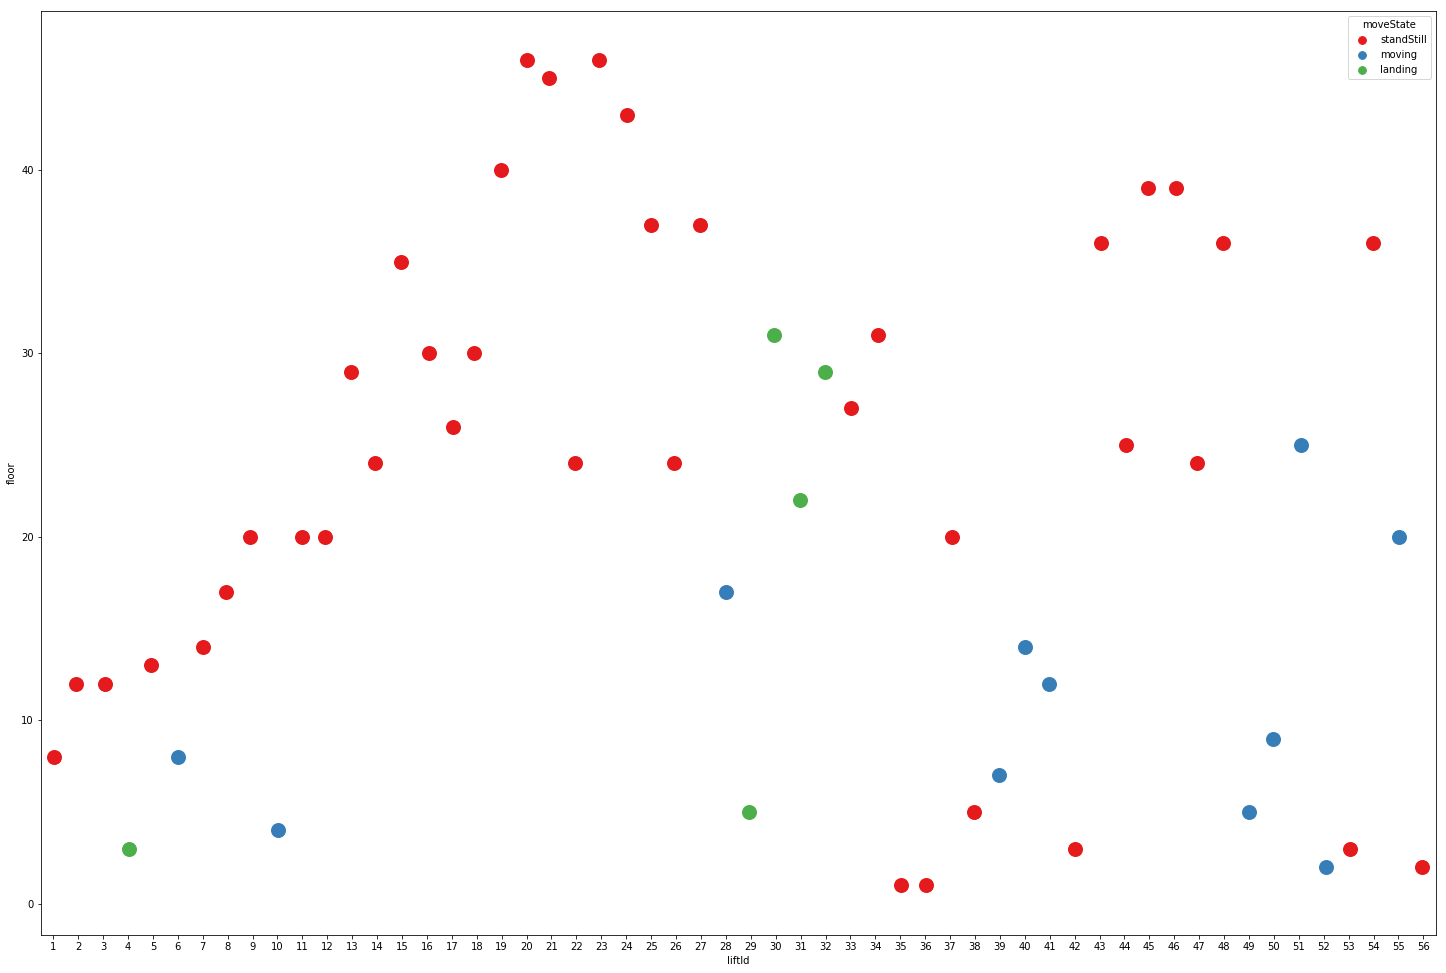

In [3]:
#对56部电梯现有位置，状态进行可视化处理

url='https://...'
r=requests.get(url)
x=r.text
x1=eval(x)
data=x1['data']['lifts']
df=pd.DataFrame(data)
plt.figure(figsize=(25,17))
ax1=sns.stripplot(x='liftId',y='floor',data=df,jitter=True,hue="moveState",palette='Set1',size=15)
plt.show()